c:\python\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


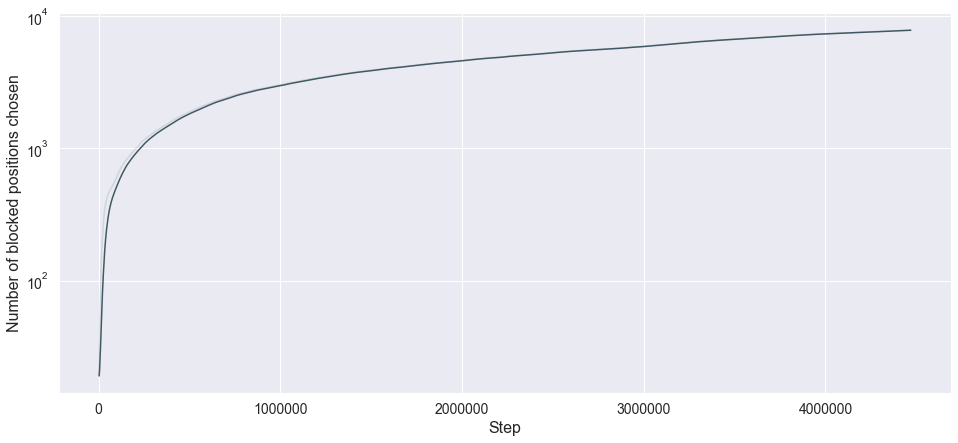

In [21]:
#part two, plot the concetaned performance files

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  

def smooth(scalars, weight):   # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value
    return smoothed


#download csv files from tensorboard and import them here, number of csv files determine the number of plot:
df = pd.read_csv("combined_csv.csv")
# df1 = pd.read_csv("Name_csv_file1.csv")
# df2 = pd.read_csv("Name_csv_file2.csv")
# df3 = pd.read_csv("Name_csv_file3.csv")

dfs = [df] #, df1, df2, df3]

smoothing_weight = 0.9 # smoothing weight
alpha= 0.15 # for shading of actual lineplot

#define colors in a tuple such that shading term aplha can be included. Used the chrome extension colorzilla
#with colorzilla colors seen on the web can be easily copied into hex, rgb, etc and be pasted here.
colors = [(0.25, 0.35, 0.39),(0.25, 0.58, 0.71),(0.17, 0.58, 0.33), (0.58, 0.82, 0.75)]
shaded_colors = [colors[i] + (alpha,) for i in range(len(colors))]


sns.set()
ax = plt.subplots(figsize=(16,7))
 
j=0
for i in dfs:    
    ax = sns.lineplot(x="Step", y="Value", data=i, color = shaded_colors[j]) #actual line ploted: shaded
    i["Value"] = smooth(i["Value"].tolist(), smoothing_weight)
    ax = sns.lineplot(x="Step", y="Value", data=i, color = colors[j]) #exponential moving average line
    j+=1

#plt.ylim(top=1) # can be adjusted if needed
#plt.xlim(right = 800000, left =0) # can be adjusted if needed
ax.set_xlabel('Step', fontsize = 16)
ax.set_ylabel('Number of blocked positions chosen', fontsize = 16)
ax.set(yscale="log")
ax.tick_params(labelsize=14)
plt.savefig('block_chosen.png')